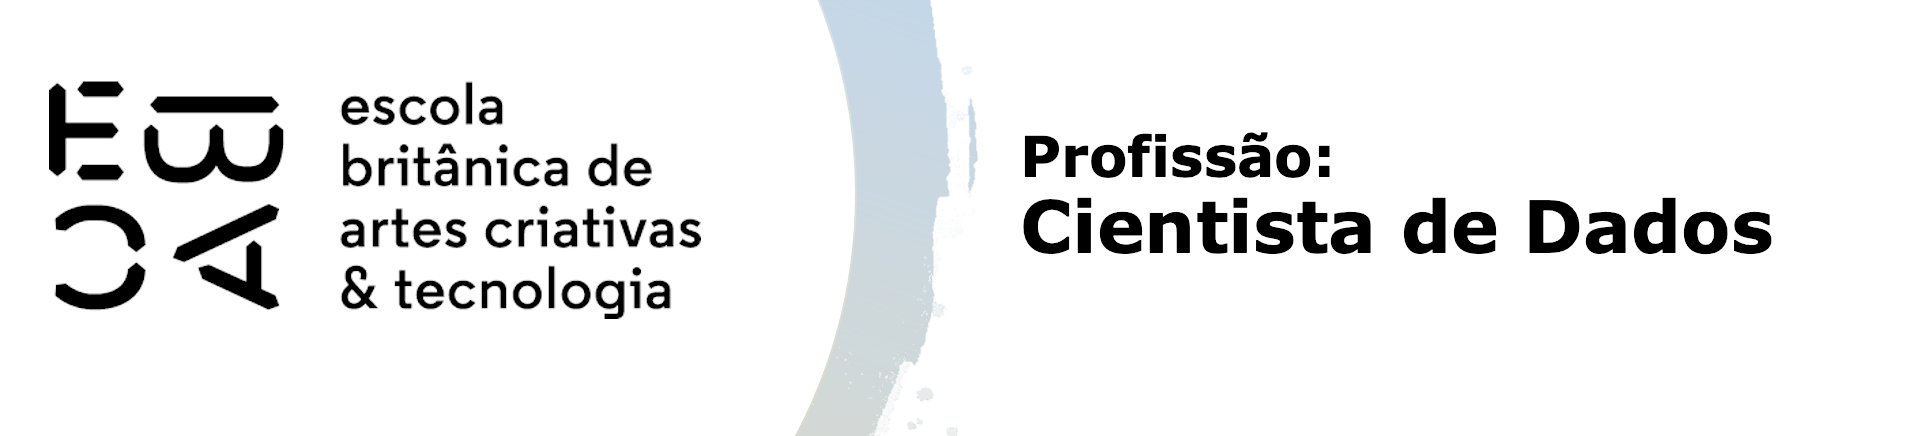

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# carregando a base
peng = sns.load_dataset('penguins')
peng.index.name = 'id'

# selecionando variáveis quantitativas
peng_num = peng.select_dtypes(include='number').dropna()

# padronizando as variáveis
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

# agrupamento hierárquico em 3 grupos
clus = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=None,
    n_clusters=3
)

# treinando o algoritmo
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [3]:
peng.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
id                                                                        
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen             NaN            NaN                NaN   
4   Adelie  Torgersen            36.7           19.3              193.0   

    body_mass_g     sex  
id                       
0        3750.0    Male  
1        3800.0  Female  
2        3250.0  Female  
3           NaN     NaN  
4        3450.0  Female

In [4]:
peng_num.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
id                                                               
0             39.1           18.7              181.0       3750.0
1             39.5           17.4              186.0       3800.0
2             40.3           18.0              195.0       3250.0
4             36.7           19.3              193.0       3450.0
5             39.3           20.6              190.0       3650.0

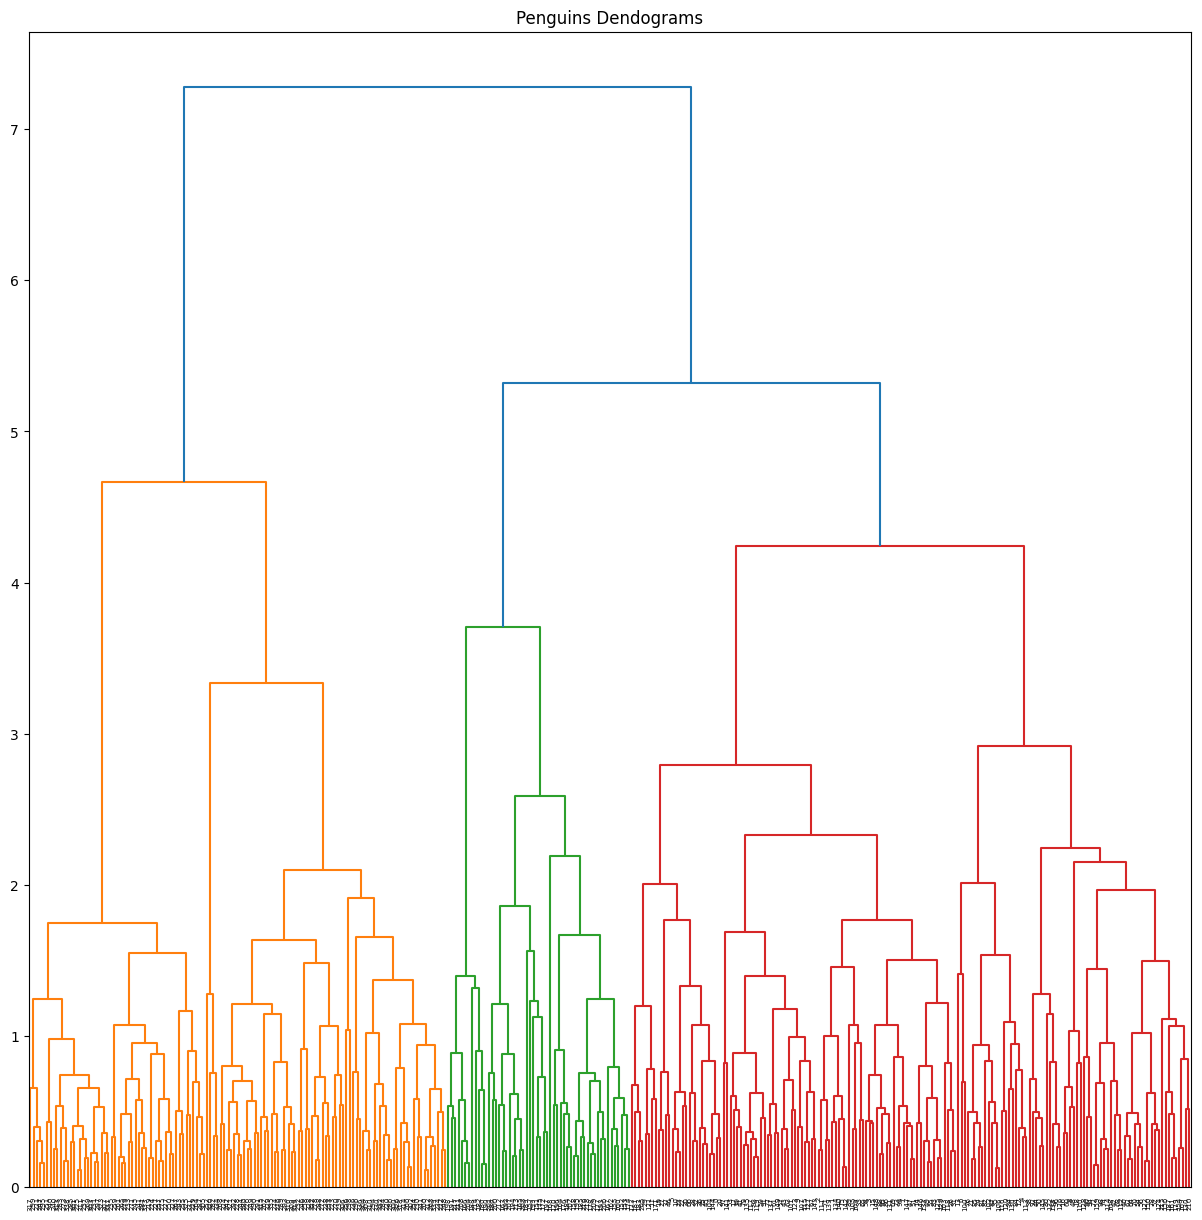

In [5]:
plt.figure(figsize=(15, 15))
plt.title('Penguins Dendograms')
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [6]:
peng_num['grupo_3'] = clus.labels_
peng_num.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  grupo_3
id                                                                        
0             39.1           18.7              181.0       3750.0        1
1             39.5           17.4              186.0       3800.0        1
2             40.3           18.0              195.0       3250.0        1
4             36.7           19.3              193.0       3450.0        1
5             39.3           20.6              190.0       3650.0        1

In [7]:
peng = peng.merge(peng_num['grupo_3'], how='left', on='id')
peng.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
id                                                                        
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen             NaN            NaN                NaN   
4   Adelie  Torgersen            36.7           19.3              193.0   

    body_mass_g     sex  grupo_3  
id                                
0        3750.0    Male      1.0  
1        3800.0  Female      1.0  
2        3250.0  Female      1.0  
3           NaN     NaN      NaN  
4        3450.0  Female      1.0

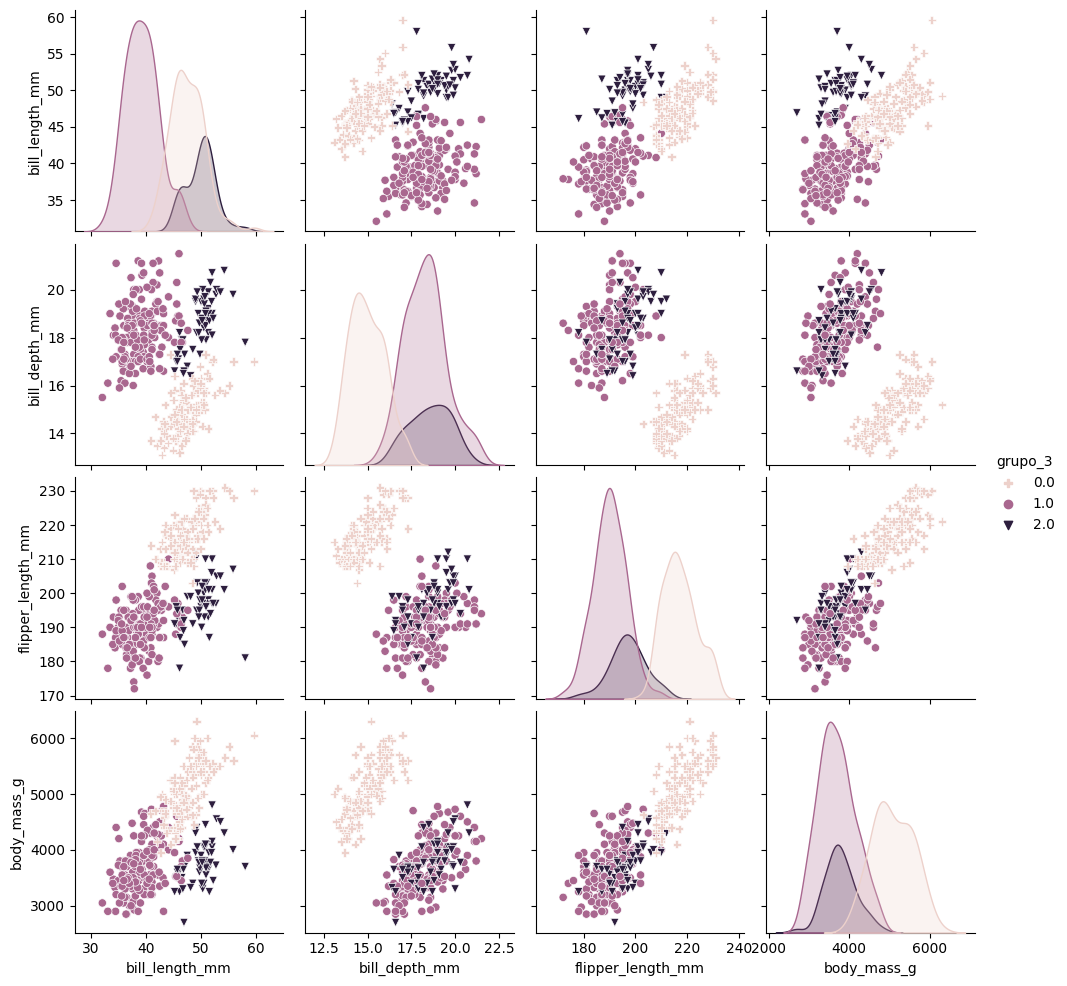

In [8]:
sns.pairplot(data=peng, hue='grupo_3', markers=['P', 'o', 'v'])

In [9]:
pd.crosstab(peng['species'], peng['grupo_3'])

grupo_3    0.0  1.0  2.0
species                 
Adelie       0  151    0
Chinstrap    0   14   54
Gentoo     123    0    0

### Análise:

- Os grupos 0 e 1 ficaram bem definidos respectivamente com Gentoo e Adelie.
- A espécie Chinstrap ficou dividido entre os grupos 1 e 2.

- O grupo 1 tem maior destaque relacionando a massa corporal, entrentanto, possuem duas espécies de pinguins. A Espécie Chinstrap tem maior variação de massa.
- O grupo 0 é predominante em bill length x body e flipper length.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [10]:
# agrupamento hierárquico em 5 grupos
clus_6 = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=None,
    n_clusters=6
)

# treinando o algoritmo
clus_6.fit(peng_pad)

peng_num['grupo_6'] = clus_6.labels_
peng = peng.merge(peng_num['grupo_6'], how='left', on='id')

In [11]:
pd.crosstab(peng['species'], peng['grupo_6'])

grupo_6    0.0  1.0  2.0  3.0  4.0  5.0
species                                
Adelie       0   91   60    0    0    0
Chinstrap    0    5    9    0   42   12
Gentoo      71    0    0   52    0    0

In [12]:
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'])

grupo_6           0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

In [13]:
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'], normalize='index')

grupo_6                0.0       1.0       2.0       3.0       4.0       5.0
species   sex                                                               
Adelie    Female  0.000000  0.945205  0.054795  0.000000  0.000000  0.000000
          Male    0.000000  0.246575  0.753425  0.000000  0.000000  0.000000
Chinstrap Female  0.000000  0.147059  0.264706  0.000000  0.588235  0.000000
          Male    0.000000  0.000000  0.000000  0.000000  0.647059  0.352941
Gentoo    Female  0.155172  0.000000  0.000000  0.844828  0.000000  0.000000
          Male    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000

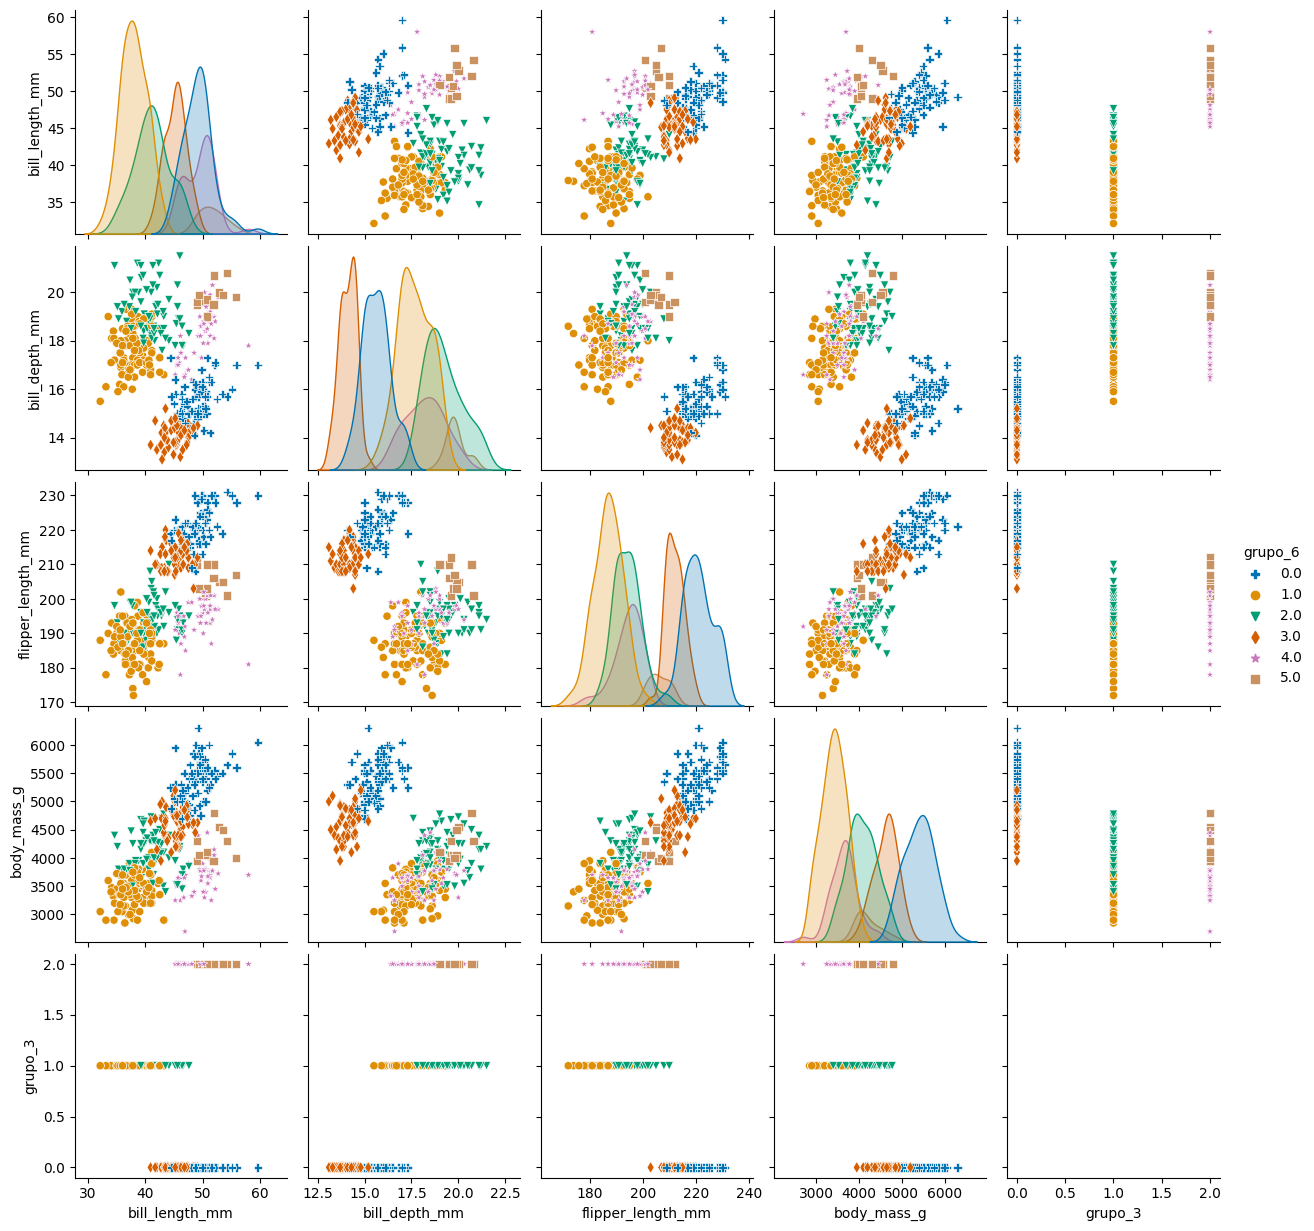

In [18]:
sns.pairplot(data=peng, hue='grupo_6', markers=['P', 'o', 'v', 'd', '*', 's'], palette='colorblind')

### Análise:

- De forma geral, as espécies Adelie e Gentoo ficaram bem definidas entre os grupos, a espécie Chinstrap ficou "espalhada".
- Os grupos 0 e 3 conseguem diferenciar a espécie Gentoo por sexo.